参数

In [105]:
#输出样本得分
output_score=list(range(12))
output_score

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [106]:
#正确分类
y=[0,0,0,0,1,0,1,1,0,1,1,1]
len(y)

12

In [107]:
#设定正占比p
p=list(range(0,101,10))
p=[i/100 for i in p]
p

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

In [108]:
#设定代价
c01=3
c10=2


考虑：一个阈值的情况

In [109]:
theta=6.5 #得分大于6.5的认为是正例

In [110]:
#阈值为6.5分下，预测的结果
def calculate_output_result(output_score,theta):
    output_result=[]
    for i in range(len(output_score)):
        if output_score[i]>theta:
            output_result.append(1)
        else:
            output_result.append(0)
    return output_result
output_result=calculate_output_result(output_score,theta)
output_result

[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

In [111]:
#统计真实正例，反例的个数m+,m-
import pandas as pd
def calculate_m_positive_negative(y):
    result=pd.value_counts(y)
    m_positive=result[1]
    m_negative=result[0]
    return m_positive,m_negative
m_positive,m_negative=calculate_m_positive_negative(y)
[m_positive,m_negative]

[6, 6]

In [112]:
#计算混淆矩阵
def calculate_confusion(output_result,y):
    con1=0
    con2=0
    con3=0
    con4=0
    for i in range(len(y)):
        if y[i]==1:#正例
            if y[i]==output_result[i]:
                con1+=1
            else:
                con2+=1
        else:
            if y[i]==output_result[i]:
                con4+=1
            else:
                con3+=1
    return con1,con2,con3,con4
con1,con2,con3,con4=calculate_confusion(output_result,y)
[con1,con2,con3,con4]
            

[4, 2, 1, 5]

In [113]:
#求几个比例，保留四位小数
def calculate_FNR_FPR(con1,con2,con3,con4):
    FNR=round(con2/(con1+con2),4)
    FPR=round(con3/(con3+con4),4)
    return FNR,FPR
FNR,FPR=calculate_FNR_FPR(con1,con2,con3,con4)
[FNR,FPR]

[0.3333, 0.1667]

In [114]:
#正概率代价
def calculate_Pcost(p,c01,c10):
    Pcosts=[]
    for i in range(len(p)):
        Pcost=round(p[i]*c01/(p[i]*c01+(1-p[i])*c10),4)
        Pcosts.append(Pcost)
    return Pcosts
Pcosts=calculate_Pcost(p,c01,c10)
Pcosts

[0.0, 0.1429, 0.2727, 0.3913, 0.5, 0.6, 0.6923, 0.7778, 0.8571, 0.931, 1.0]

In [115]:
#归一化总代价
def calculate_cost_norm(p,c01,c10,FNR,FPR):
    costs_norm=[]
    for i in range(len(p)):
        cost_norm=round((FNR*p[i]*c01+FPR*(1-p[i])*c10)/(p[i]*c01+(1-p[i])*c10),4)
        costs_norm.append(cost_norm)
    return costs_norm
costs_norm=calculate_cost_norm(p,c01,c10,FNR,FPR)
costs_norm

[0.1667,
 0.1905,
 0.2121,
 0.2319,
 0.25,
 0.2667,
 0.282,
 0.2963,
 0.3095,
 0.3218,
 0.3333]

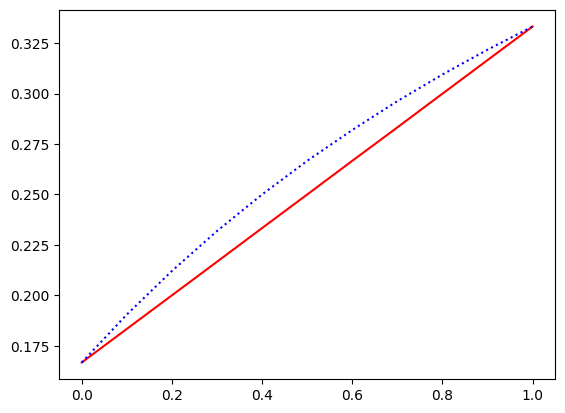

In [116]:
#画出图像
import matplotlib as mat
import matplotlib.pyplot as plt
def plot_lines(X,Y,color):
    plt.plot(X,Y,color)
    return
plot_lines(Pcosts,costs_norm,'r')
plot_lines(p,costs_norm,'b:')
plt.show()

使用p作为x轴，图像为曲线，使用归一化正概率，则为直线

多阈值的情况下

In [117]:
thetas=list(range(12))
thetas=[i+0.5 for i in thetas]
thetas

[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5]

In [118]:
#定义计算的每个theta对应点的函数，并存放在列表里
def calculate_Pcost_cost_norm(thetas,output_score,y,calculate_Pcost,calculate_cost_norm):
    Pcosts_n=[]
    costs_norm_n=[]
    theta_FNR_FPR={}
    for i in range(len(thetas)):
        theta=thetas[i]
        #计算输出结果
        output_result=calculate_output_result(output_score,theta)
        #统计正反例
        m_positive,m_negative=calculate_m_positive_negative(y)
        
        #计算混淆矩阵
        con1,con2,con3,con4=calculate_confusion(output_result,y)
        #求FNR，FPR
        FNR,FPR=calculate_FNR_FPR(con1,con2,con3,con4)
        theta_FNR_FPR[theta]=[FNR,FPR]
        
        #计算正概率
        Pcosts=calculate_Pcost(p,c01,c10)
        Pcosts_n.append(Pcosts)
        
        #归一化总代价
        cost_norm=calculate_cost_norm(p,c01,c10,FNR,FPR)
        costs_norm_n.append(cost_norm)
        
    return Pcosts_n,costs_norm_n,theta_FNR_FPR

In [119]:
Pcosts_n,costs_norm_n,theta_FNR_FPR=calculate_Pcost_cost_norm(thetas,output_score,y,calculate_Pcost,calculate_cost_norm)
costs_norm_n

[[0.8333,
  0.7143,
  0.606,
  0.5072,
  0.4166,
  0.3333,
  0.2564,
  0.1852,
  0.119,
  0.0575,
  0.0],
 [0.6667,
  0.5715,
  0.4849,
  0.4058,
  0.3333,
  0.2667,
  0.2051,
  0.1482,
  0.0952,
  0.046,
  0.0],
 [0.5, 0.4286, 0.3636, 0.3043, 0.25, 0.2, 0.1538, 0.1111, 0.0714, 0.0345, 0.0],
 [0.3333,
  0.2857,
  0.2424,
  0.2029,
  0.1666,
  0.1333,
  0.1026,
  0.0741,
  0.0476,
  0.023,
  0.0],
 [0.3333,
  0.3095,
  0.2879,
  0.2681,
  0.25,
  0.2333,
  0.218,
  0.2037,
  0.1905,
  0.1782,
  0.1667],
 [0.1667,
  0.1667,
  0.1667,
  0.1667,
  0.1667,
  0.1667,
  0.1667,
  0.1667,
  0.1667,
  0.1667,
  0.1667],
 [0.1667,
  0.1905,
  0.2121,
  0.2319,
  0.25,
  0.2667,
  0.282,
  0.2963,
  0.3095,
  0.3218,
  0.3333],
 [0.1667,
  0.2143,
  0.2576,
  0.2971,
  0.3333,
  0.3667,
  0.3974,
  0.4259,
  0.4524,
  0.477,
  0.5],
 [0.0, 0.0714, 0.1364, 0.1957, 0.25, 0.3, 0.3462, 0.3889, 0.4286, 0.4655, 0.5],
 [0.0,
  0.0952,
  0.1818,
  0.2609,
  0.3333,
  0.4,
  0.4616,
  0.5185,
  0.5715,
  

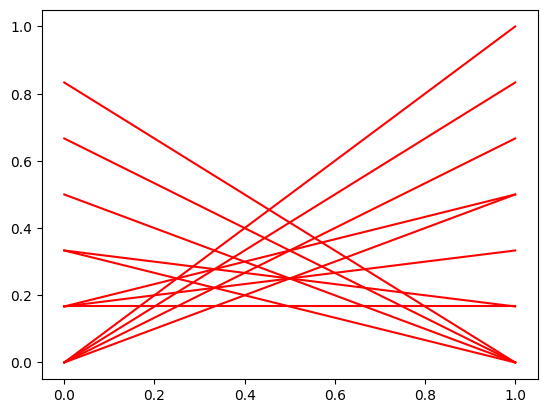

In [120]:
for i in range(len(Pcosts_n)):
    plot_lines(Pcosts_n[i],costs_norm_n[i],'r')
plt.show()

In [121]:
#查看theta与对应的FNR，FPR
theta_FNR_FPR

{0.5: [0.0, 0.8333],
 1.5: [0.0, 0.6667],
 2.5: [0.0, 0.5],
 3.5: [0.0, 0.3333],
 4.5: [0.1667, 0.3333],
 5.5: [0.1667, 0.1667],
 6.5: [0.3333, 0.1667],
 7.5: [0.5, 0.1667],
 8.5: [0.5, 0.0],
 9.5: [0.6667, 0.0],
 10.5: [0.8333, 0.0],
 11.5: [1.0, 0.0]}

如果不归一化


In [122]:
#正概率代价（非归一化）
def calculate_Pcost_2(p,c01,c10):
    Pcosts=[]
    for i in range(len(p)):
        Pcost=round(p[i]*c01,4)
        Pcosts.append(Pcost)
    return Pcosts
#总代价(非归一化)
def calculate_cost_norm_2(p,c01,c10,FNR,FPR):
    costs_norm=[]
    for i in range(len(p)):
        cost_norm=round(FNR*(p[i]*c01)+FPR*(1-p[i])*c10,4)
        costs_norm.append(cost_norm)
    return costs_norm

In [123]:
Pcosts_n,costs_norm_n,theta_FNR_FPR=calculate_Pcost_cost_norm(thetas,output_score,y,calculate_Pcost_2,calculate_cost_norm_2)

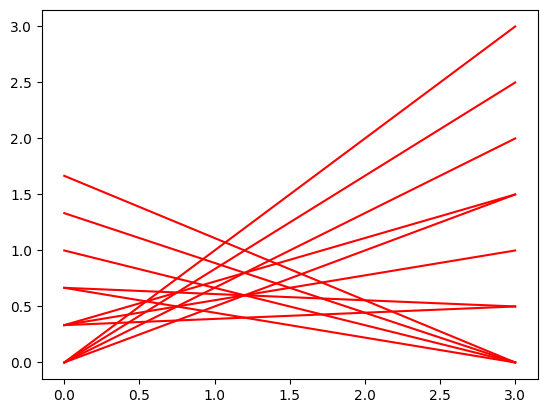

In [124]:
for i in range(len(Pcosts_n)):
    plot_lines(Pcosts_n[i],costs_norm_n[i],'r')
plt.show()

In [ ]:
其纵轴左，右不统一，受c01,c10影响
横轴也不统一